**Lab 3 Malafeev PIbd-31**

1.Определим две бизнес цели. Во-первых, у нас есть в датасете есть столбец NumWebPurchases — количество покупок через интернет. Через него поставим первую бизнес цель: Увеличение продаж через интернет-магазин. Также у нас имеется столбец Response — отклик на текущую кампанию. Через него мы поставим вторую бизнес цель: Анализ отклика на предыдущие кампании для повышения их эффективности.

2.Цели технического проекта. Для увеличения интернет-продаж:

Разработать модели сегментации клиентов на основе их характеристик (доход, покупки).
Создать прогнозные модели для определения вероятности веб-покупок.

Для оптимизации кампаний:

Провести анализ данных об откликах клиентов на прошлые кампании.
Сформировать рекомендации по улучшению таргетирования на основе анализа успешных кампаний.

3.код


In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd
dataset = pd.read_csv(".//datasetlab1//marketing_campaign.csv", sep="\t")

# Удаление неинформативных столбцов и выбор целевых данных для бизнес-целей
columns_to_use = [
    "Income", "Kidhome", "Teenhome", "NumWebPurchases", "MntWines", 
    "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts",
    "MntGoldProds", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", 
    "AcceptedCmp4", "AcceptedCmp5", "Response", "Recency"
]

# Очистка данных от пропусков и выбор только необходимых столбцов
filtered_data = dataset[columns_to_use].dropna()

# Разделение данных на признаки (X) и целевую переменную (y) для оптимизации кампаний
X = filtered_data.drop(columns=["Response"])
y = filtered_data["Response"]

# Разбиение на обучающую (60%), контрольную (20%) и тестовую (20%) выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Проверка размера выборок
X_train.shape, X_val.shape, X_test.shape

((1329, 16), (443, 16), (444, 16))

5.Выполним оценку сбалансированности.
Подсказка: за 0 будем брать не отклик, за 1 - отклик клиента на рекламу.

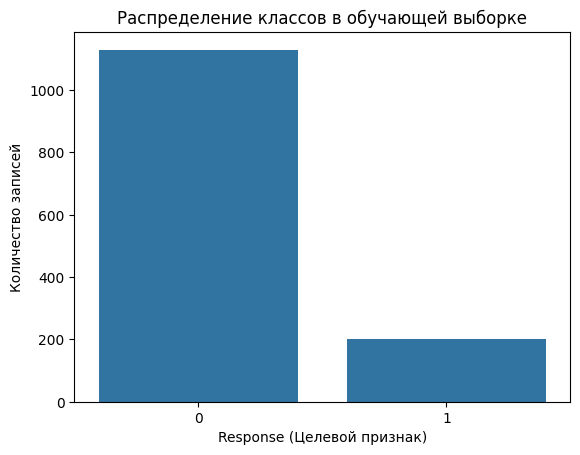

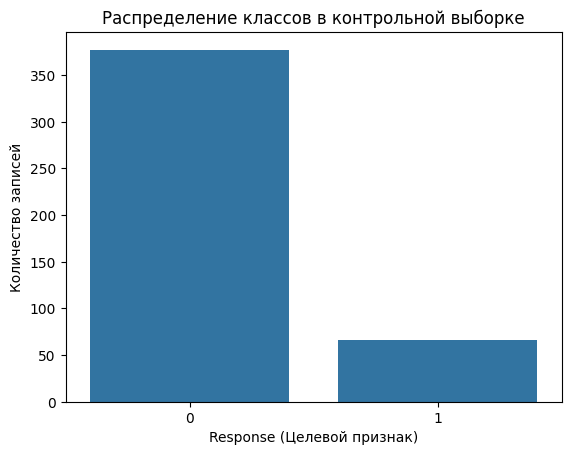

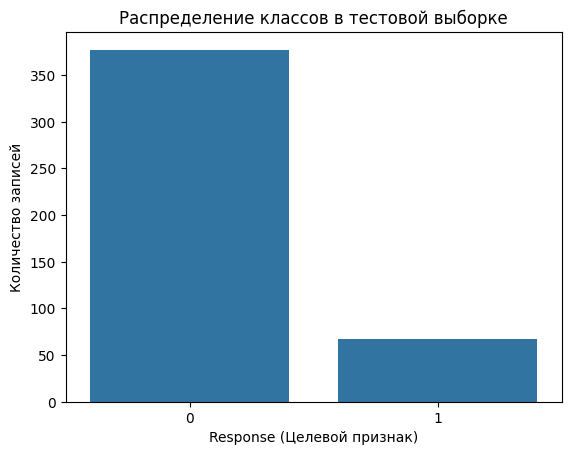

Распределение классов в обучающей выборке (в процентах):
Response
0    84.951091
1    15.048909
Name: proportion, dtype: float64


In [5]:
# Импорт необходимых библиотек
import seaborn as sns
import matplotlib.pyplot as plt

# Функция для визуализации распределения классов
def plot_class_distribution(y, title):
    sns.countplot(x=y)
    plt.title(title)
    plt.xlabel("Response (Целевой признак)")
    plt.ylabel("Количество записей")
    plt.show()

# Оценка сбалансированности классов в выборках
plot_class_distribution(y_train, "Распределение классов в обучающей выборке")
plot_class_distribution(y_val, "Распределение классов в контрольной выборке")
plot_class_distribution(y_test, "Распределение классов в тестовой выборке")

# Проверка пропорций классов в обучающей выборке
class_distribution_train = y_train.value_counts(normalize=True) * 100
print("Распределение классов в обучающей выборке (в процентах):")
print(class_distribution_train)


Сделаем для второй бизнес цели.


In [7]:
from sklearn.model_selection import train_test_split

# Целевой признак для второй бизнес-цели
target_col_2 = 'NumWebPurchases'

# Разделение данных на обучающую, контрольную и тестовую выборки
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(
    X.drop(columns=[target_col_2]),  # Все признаки, кроме целевого
    X[target_col_2],                # Целевой признак
    test_size=0.4,                  # 40% на контрольную и тестовую выборки
    random_state=42
)

X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(
    X_temp_2,
    y_temp_2,
    test_size=0.5,  # 50% от оставшихся данных для тестовой выборки
    random_state=42
)

# Проверим размеры выборок
print("Размеры выборок для второй цели:")
print(f"Обучающая: {X_train_2.shape}, Контрольная: {X_val_2.shape}, Тестовая: {X_test_2.shape}")


Размеры выборок для второй цели:
Обучающая: (1329, 15), Контрольная: (443, 15), Тестовая: (444, 15)


Оценка:

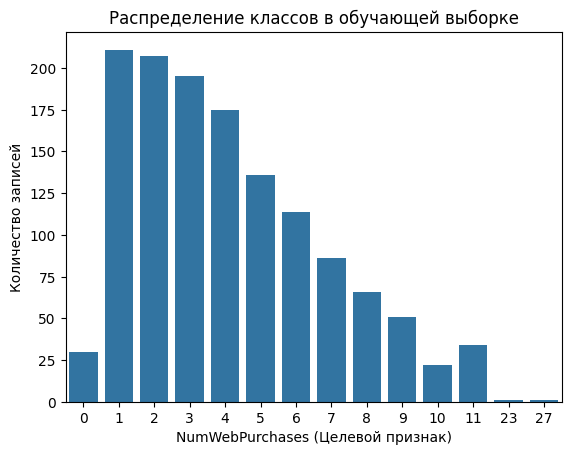

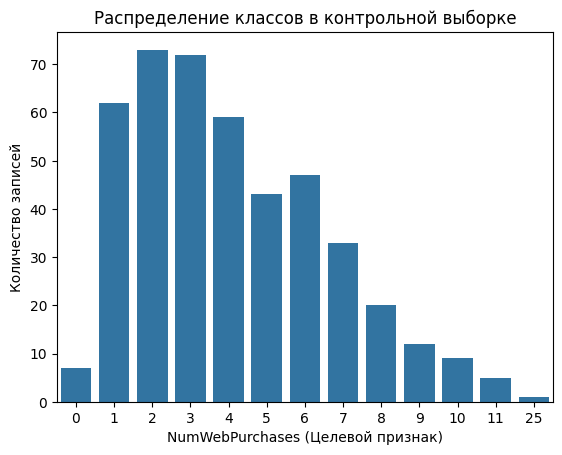

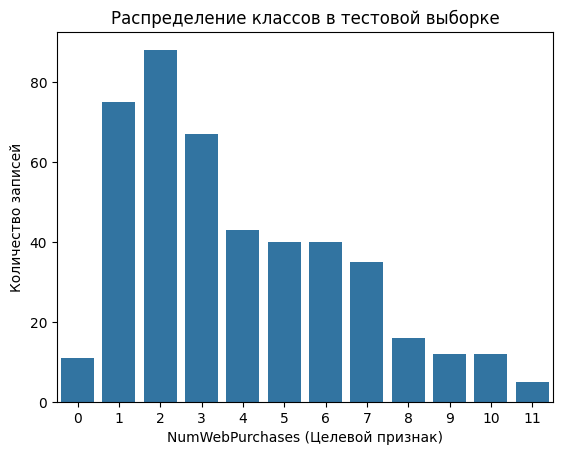

Распределение классов в обучающей выборке (в процентах):
NumWebPurchases
1     15.876599
2     15.575621
3     14.672686
4     13.167795
5     10.233258
6      8.577878
7      6.471031
8      4.966140
9      3.837472
11     2.558315
0      2.257336
10     1.655380
23     0.075245
27     0.075245
Name: proportion, dtype: float64


In [10]:
# Функция для визуализации распределения классов
def plot_class_distribution(y, title):
    sns.countplot(x=y)
    plt.title(title)
    plt.xlabel("NumWebPurchases (Целевой признак)")
    plt.ylabel("Количество записей")
    plt.show()

# Оценка сбалансированности классов в выборках
plot_class_distribution(y_train_2, "Распределение классов в обучающей выборке")
plot_class_distribution(y_val_2, "Распределение классов в контрольной выборке")
plot_class_distribution(y_test_2, "Распределение классов в тестовой выборке")

# Проверка пропорций классов в обучающей выборке
class_distribution_train_2 = y_train_2.value_counts(normalize=True) * 100
print("Распределение классов в обучающей выборке (в процентах):")
print(class_distribution_train_2)


6.Видим несбалансированность, для Второй бизнес цели выполним Upsampling (увеличение выборки для редких классов). Сделаем покупок больше.

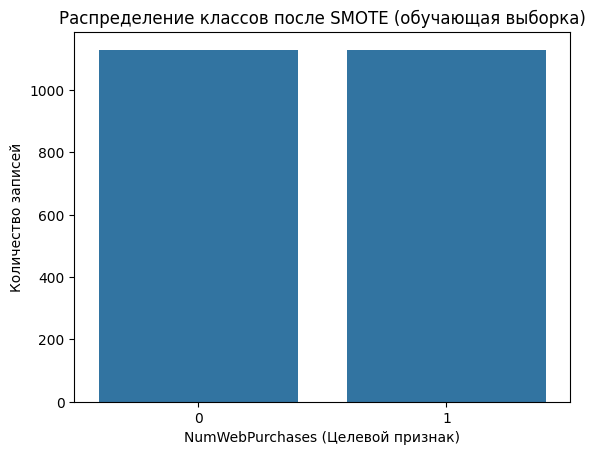

Распределение классов после SMOTE (в процентах):
Response
0    50.0
1    50.0
Name: proportion, dtype: float64


In [16]:
from imblearn.over_sampling import SMOTE

# Применение SMOTE к обучающей выборке
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Проверим распределение после аугментации
plot_class_distribution(y_train_balanced, "Распределение классов после SMOTE (обучающая выборка)")

# Проверим процентное распределение
balanced_distribution = y_train_balanced.value_counts(normalize=True) * 100
print("Распределение классов после SMOTE (в процентах):")
print(balanced_distribution)


Для первой бизнес цели:

Размерность выборки после RandomOverSampler:
X_train_res: (2954, 15)
y_train_res: (2954,)

Распределение классов после балансировки (в процентах):
NumWebPurchases
2     7.142857
5     7.142857
1     7.142857
8     7.142857
9     7.142857
3     7.142857
11    7.142857
7     7.142857
6     7.142857
4     7.142857
0     7.142857
10    7.142857
23    7.142857
27    7.142857
Name: proportion, dtype: float64


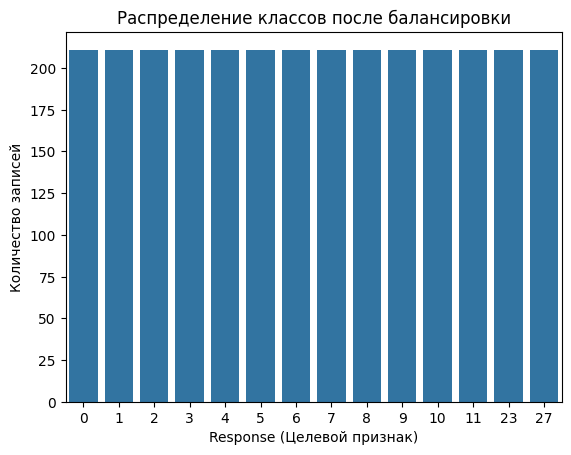

In [24]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Применение RandomOverSampler для балансировки классов
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train_2, y_train_2)

# Выводим новые размеры выборки
print(f"Размерность выборки после RandomOverSampler:")
print(f"X_train_res: {X_train_res.shape}")
print(f"y_train_res: {y_train_res.shape}")

# Распределение классов в обучающей выборке после балансировки
class_distribution_res = pd.Series(y_train_res).value_counts(normalize=True) * 100
print("\nРаспределение классов после балансировки (в процентах):")
print(class_distribution_res)

# Для визуализации можно использовать график
import seaborn as sns
import matplotlib.pyplot as plt

# Функция для визуализации распределения классов
def plot_class_distribution(y, title):
    sns.countplot(x=y)
    plt.title(title)
    plt.xlabel("Response (Целевой признак)")
    plt.ylabel("Количество записей")
    plt.show()

# Построение графика распределения классов
plot_class_distribution(y_train_res, "Распределение классов после балансировки")





7-8. Делаем лютый кодик, ставим библиотеку, пишем комменты)

In [42]:
import featuretools as ft
print(ft.__version__)

1.31.0


In [46]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer, MinMaxScaler, StandardScaler
import featuretools as ft
from imblearn.over_sampling import RandomOverSampler

# 1. One-hot encoding для категориальных признаков
X_train_2 = pd.get_dummies(X_train_2, drop_first=True)
X_test_2 = pd.get_dummies(X_test_2, drop_first=True)

# 2. Дискретизация числовых признаков
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_train_2['Income_binned'] = discretizer.fit_transform(X_train_2[['Income']])
X_test_2['Income_binned'] = discretizer.transform(X_test_2[['Income']])

# 3. Масштабирование признаков
scaler_minmax = MinMaxScaler()
X_train_2[['Income']] = scaler_minmax.fit_transform(X_train_2[['Income']])
X_test_2[['Income']] = scaler_minmax.transform(X_test_2[['Income']])

# Стандартизация признаков
scaler_standard = StandardScaler()
X_train_2[['Income']] = scaler_standard.fit_transform(X_train_2[['Income']])
X_test_2[['Income']] = scaler_standard.transform(X_test_2[['Income']])

# 4. Применение Featuretools для создания признаков
es = ft.EntitySet(id="data")

# Мы добавляем данные в EntitySet с помощью метода add_dataframe
es = es.add_dataframe(
    dataframe_name="customer_data",
    dataframe=X_train_2,
    index="customer_id" 
)

# Применяем Featuretools для создания признаков
# Изменения: теперь указываем `target_dataframe_name` вместо `target_entity`
features, feature_names = ft.dfs(entityset=es, target_dataframe_name="customer_data")

print(features.head())

# 5. Балансировка выборки с помощью RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train_2, y_train_2)

print(f"Размерность выборки после RandomOverSampler:")
print(f"X_train_res: {X_train_res.shape}")
print(f"y_train_res: {y_train_res.shape}")


               Income  Kidhome  Teenhome  MntWines  MntFruits  \
customer_id                                                     
0           -0.263557        1         1        68          0   
1           -1.102440        1         0        18          3   
2            0.633408        0         1       225        162   
3            1.135917        1         0       739        107   
4            1.299116        0         0       395        183   

             MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
customer_id                                                                     
0                         16                0                 0             8   
1                         19                3                 3             6   
2                        387              106                36            29   
3                        309              140                80            35   
4                        565              166             

c:\Ulstu\MII\miivenv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


Видим снизу ошибку: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn. Она означает, что EntitySet состоит только из одного DataFrame. Т.е. только одна сущность.


ТЕперь для другой бизнес цели)

In [50]:
# 1. One-hot encoding для категориальных признаков
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# 2. Дискретизация числовых признаков
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_train['Income_binned'] = discretizer.fit_transform(X_train[['Income']])
X_test['Income_binned'] = discretizer.transform(X_test[['Income']])

# 3. Масштабирование признаков
scaler_minmax = MinMaxScaler()
X_train[['Income']] = scaler_minmax.fit_transform(X_train[['Income']])
X_test[['Income']] = scaler_minmax.transform(X_test[['Income']])

# Стандартизация признаков
scaler_standard = StandardScaler()
X_train[['Income']] = scaler_standard.fit_transform(X_train[['Income']])
X_test[['Income']] = scaler_standard.transform(X_test[['Income']])

# 4. Применение Featuretools для создания признаков
es = ft.EntitySet(id="data")
es = es.add_dataframe(dataframe_name="customer_data", dataframe=X_train, index="customer_id")

# Применяем deep feature synthesis для создания новых признаков
features, feature_names = ft.dfs(entityset=es, target_dataframe_name="customer_data", max_depth=2)


print(features.head())

# 5. Балансировка выборки с помощью RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_res_1, y_train_res_1 = ros.fit_resample(X_train, y_train)

print(f"Размерность выборки после RandomOverSampler для первой бизнес-цели:")
print(f"X_train_res_1: {X_train_res_1.shape}")
print(f"y_train_res_1: {y_train_res_1.shape}")

               Income  Kidhome  Teenhome  NumWebPurchases  MntWines  \
customer_id                                                           
0            0.739837        0         1                6       522   
1           -0.203068        1         1                1        22   
2            0.160233        0         1                7       479   
3            1.049812        0         0                4       594   
4            0.119182        1         2                6       416   

             MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
customer_id                                                                  
0                    0              522              227               120   
1                    2               10                6                 4   
2                    5               82                7                17   
3                   51              631               72                55   
4                    0            

c:\Ulstu\MII\miivenv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


Опять то же предупреждение. Итого мы выполнили пункты 7-8.

9.Начнём работу. Сначала для модели кое что настроим, чтобы она не ругалась)

In [61]:
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)

X_train columns: Index(['customer_id', 'Income', 'Kidhome', 'Teenhome', 'NumWebPurchases',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'AcceptedCmp1', 'AcceptedCmp2',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Recency',
       'Income_binned'],
      dtype='object')
X_test columns: Index(['Income', 'Kidhome', 'Teenhome', 'NumWebPurchases', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Recency', 'Income_binned'],
      dtype='object')


Видим, что столбцы отличаются. Выпустим фикс

In [66]:
X_train = X_train.drop(columns=['customer_id'], errors='ignore')
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)



X_train columns: Index(['Income', 'Kidhome', 'Teenhome', 'NumWebPurchases', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Recency', 'Income_binned'],
      dtype='object')
X_test columns: Index(['Income', 'Kidhome', 'Teenhome', 'NumWebPurchases', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Recency', 'Income_binned'],
      dtype='object')


Привели к одниаковым столбцам. Но при попытке обучения вылезала новая ошибка:ValueError: The feature names should match those that were passed during fit. Feature names unseen at fit time: - NumWebPurchases. Залезем посмотреть в них.

In [70]:
# Выведем столбец 'NumWebPurchases' из X_train и X_test
print("NumWebPurchases in X_train:")
print(X_train['NumWebPurchases'].head())  # Покажем первые 5 значений

print("NumWebPurchases in X_test:")
print(X_test['NumWebPurchases'].head()) 

NumWebPurchases in X_train:
0    6
1    1
2    7
3    4
4    6
Name: NumWebPurchases, dtype: int64
NumWebPurchases in X_test:
937     11
987      9
8        3
282      4
1341     5
Name: NumWebPurchases, dtype: int64


In [72]:
print(X_train.index[:10])  # Проверим первые 10 индексов в X_train
print(X_test.index[:10])   # Проверим первые 10 индексов в X_test


Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')
Index([937, 987, 8, 282, 1341, 1879, 286, 1080, 525, 977], dtype='int64')


Видим индексы полетели. Сбросим хехехе

In [76]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [77]:
print("NumWebPurchases in X_train:", X_train['NumWebPurchases'].head())
print("NumWebPurchases in X_test:", X_test['NumWebPurchases'].head())


NumWebPurchases in X_train: 0    6
1    1
2    7
3    4
4    6
Name: NumWebPurchases, dtype: int64
NumWebPurchases in X_test: 0    11
1     9
2     3
3     4
4     5
Name: NumWebPurchases, dtype: int64


Accuracy: 0.8761261261261262
ROC-AUC: 0.8519339641315966
Время обучения модели: 0.2755 секунд
Время предсказания: 0.0070 секунд
Средняя точность по кросс-валидации: 0.8736
Корреляция признаков с целевой переменной:
Response            1.000000
AcceptedCmp5        0.323374
AcceptedCmp1        0.297345
AcceptedCmp3        0.254005
MntWines            0.246299
MntMeatProducts     0.237746
AcceptedCmp4        0.180205
AcceptedCmp2        0.169294
NumWebPurchases     0.151431
MntGoldProds        0.140332
Income              0.133047
MntFruits           0.122443
MntSweetProducts    0.116170
MntFishProducts     0.108145
Kidhome            -0.077909
Teenhome           -0.153901
Recency            -0.199766
Name: Response, dtype: float64


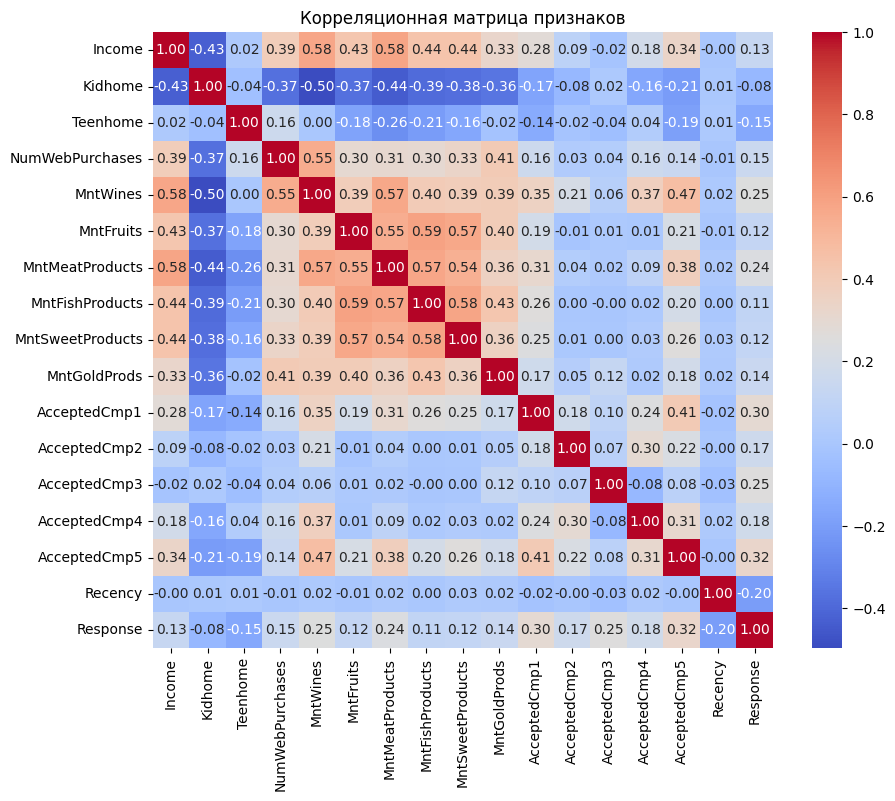

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       377
           1       0.70      0.31      0.43        67

    accuracy                           0.88       444
   macro avg       0.79      0.64      0.68       444
weighted avg       0.86      0.88      0.86       444



In [82]:
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Оценка предсказательной способности (Accuracy и ROC-AUC для бинарной классификации)
model = RandomForestClassifier(random_state=42)

start_time = time.perf_counter()
model.fit(X_train, y_train)
end_time = time.perf_counter()

train_time = end_time - start_time

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print(f"Время обучения модели: {train_time:.4f} секунд")

# 2. Оценка скорости вычисления (время предсказания)
start_time = time.perf_counter()
y_pred = model.predict(X_test)
end_time = time.perf_counter()
predict_time = end_time - start_time

print(f"Время предсказания: {predict_time:.4f} секунд")

# 3. Оценка надежности модели с помощью перекрестной проверки
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
mean_cv_score = np.mean(cv_scores)
print(f"Средняя точность по кросс-валидации: {mean_cv_score:.4f}")

# 4. Оценка корреляции признаков с целевой переменной
correlation_matrix = pd.concat([X, y], axis=1).corr()
correlation_with_target = correlation_matrix['Response'].sort_values(ascending=False)
print("Корреляция признаков с целевой переменной:")
print(correlation_with_target)

# Визуализация корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица признаков')
plt.show()

# Дополнительная информация о модели
print(classification_report(y_test, y_pred))


ВРОДЕ ВСЁ Я ТАК ДОЛГО ЧИНИЛСЯ